In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import math
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('diabetes2.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Number of Outcome for each 0 and 1 are:
 0    500
1    268
Name: Outcome, dtype: int64


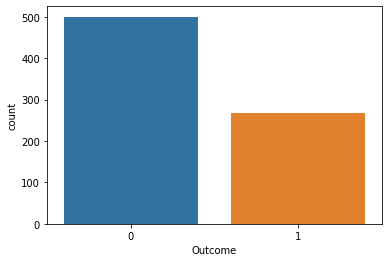

In [5]:
sns.countplot(x='Outcome', data=df)
print('Number of Outcome for each 0 and 1 are:\n',
      df['Outcome'].value_counts())

<AxesSubplot:>

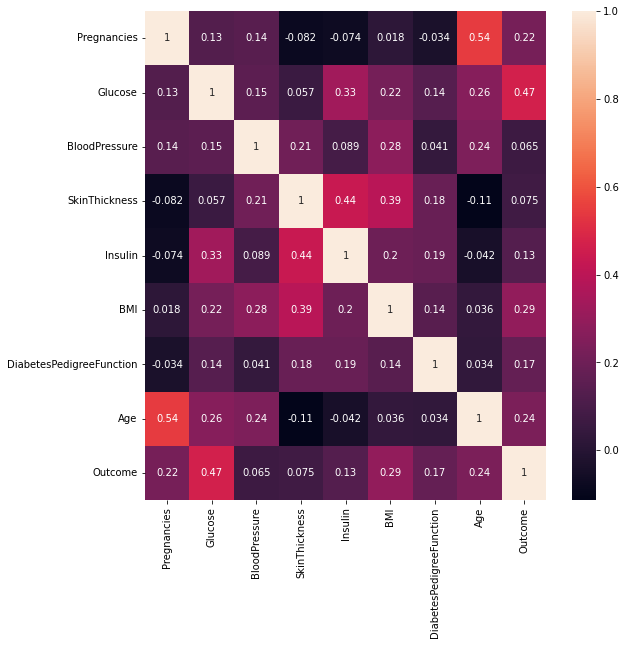

In [6]:
plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(), annot=True)


In [39]:
x = df.drop("Outcome", axis=1)
y = df.Outcome

In [5]:
x.shape

(768, 8)

In [6]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
y.shape

(768,)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [41]:
from sklearn import linear_model

In [42]:
model=linear_model.LogisticRegression()

In [43]:
model.fit(X_train,y_train)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
50,1,103,80,11,82,19.4,0.491,22
171,6,134,70,23,130,35.4,0.542,29
255,1,113,64,35,0,33.6,0.543,21
694,2,90,60,0,0,23.5,0.191,25
166,3,148,66,25,0,32.5,0.256,22
...,...,...,...,...,...,...,...,...
176,6,85,78,0,0,31.2,0.382,42
546,5,187,76,27,207,43.6,1.034,53
501,3,84,72,32,0,37.2,0.267,28
63,2,141,58,34,128,25.4,0.699,24


In [44]:
out1=model.predict(X_test)

In [14]:
out1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [45]:
er=y_test-out1

In [46]:
er

311    0
186    0
254    0
11     1
193    0
      ..
268    0
130    0
3      0
2      1
234    0
Name: Outcome, Length: 79, dtype: int64

In [47]:
man1 = np.array([[0, 100, 100, 50, 100, 32, 0.2, 56]])
out1 = model.predict(man1)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [48]:
print(out1)

[0]


In [49]:
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid')) 
model1.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
#shabake asabi

In [50]:

model1.fit(X_train, y_train, validation_data=(
    X_test, y_test), epochs=200, batch_size=10)

Epoch 1/200
32/32 [==============================] - 2s 17ms/step - loss: 5.3760 - accuracy: 0.5367 - val_loss: 3.9841 - val_accuracy: 0.4937
Epoch 2/200
32/32 [==============================] - 0s 5ms/step - loss: 3.2118 - accuracy: 0.5431 - val_loss: 3.5277 - val_accuracy: 0.5063
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 2.6475 - accuracy: 0.5655 - val_loss: 3.0819 - val_accuracy: 0.5443
Epoch 4/200
32/32 [==============================] - 0s 5ms/step - loss: 2.4659 - accuracy: 0.5655 - val_loss: 2.7366 - val_accuracy: 0.5949
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 2.1832 - accuracy: 0.5847 - val_loss: 2.3073 - val_accuracy: 0.5696
Epoch 6/200
32/32 [==============================] - 0s 5ms/step - loss: 2.0474 - accuracy: 0.5815 - val_loss: 1.9609 - val_accuracy: 0.5316
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 1.7381 - accuracy: 0.5783 - val_loss: 1.7342 - val_accuracy: 0.5949
Epoch 8/200


In [53]:
scores = model1.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model1.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


10/10 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7891
Training Accuracy: 78.91%

3/3 [==============================] - 0s 4ms/step - loss: 0.5584 - accuracy: 0.7595
Testing Accuracy: 75.95%



In [54]:
y_test_pred = model1.predict(X_test)

3/3 [==============================] - 0s 0s/step


In [55]:
itr = 0
ifa = 0
for ii, i in enumerate(y_test):
    xp = -1
    tf = ""

    if y_test_pred[ii] >= 0.7:
        xp = 1
    else:
        xp = 0

    if i == xp:
        tf = ""
        itr = itr+1
    else:
        tf = "false"
        ifa = ifa+1

    # print(ii,i,xp,tf)

print("True:", itr, "  False:", ifa)

True: 58   False: 21


In [56]:
z = itr+ifa
print(z)
p = (itr*100)/z
print(p)

79
73.41772151898734


In [57]:
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
man2 = np.array([[0, 100, 100, 50, 100, 32, 0.2, 56]])
out2 = model1.predict(man2)

1/1 [==============================] - 0s 105ms/step


In [59]:
print(out1)

[0]


In [27]:
for layer in model.layers:
    print("Layer Name: " + layer.name)
    print("Type of layer: " + layer.__class__.__name__)
    print("Input dimesion: {}".format(layer.input_shape[1:]))
    print("Output dimesion: {}".format(layer.output_shape[1:]))
    print("Parameter Count: {}".format(layer.count_params()))
    try:
        print("Activation : " + layer.activation.__name__)
        print(" ")
    except:
        print(" ")


Layer Name: dense
Type of layer: Dense
Input dimesion: (8,)
Output dimesion: (12,)
Parameter Count: 108
Activation : relu
 
Layer Name: dense_1
Type of layer: Dense
Input dimesion: (12,)
Output dimesion: (8,)
Parameter Count: 104
Activation : relu
 
Layer Name: dense_2
Type of layer: Dense
Input dimesion: (8,)
Output dimesion: (1,)
Parameter Count: 9
Activation : sigmoid
 


In [28]:
model.save_weights("model.h5")
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [29]:
model.load_weights('model.h5')